In [ ]:
# Makine Öğrenmesi Algoritmaları ve Bir Uygulama Örneği 


# Makine öğrenmesi, bilgisayarların veri içindeki kalıpları otomatik olarak öğrenerek tahminler yapmasını veya kararlar almasını sağlayan bir yapay zeka dalıdır.
# Bu süreçte, algoritmalar dediğimiz matematiksel modeller, verileri analiz ederek belirli görevleri yerine getirmek için eğitilirler.

# Yaygın Makine Öğrenmesi Algoritma Türleri

# •	Denetimli Öğrenme: Veri setindeki girdi ve çıktı örnekleri kullanılarak bir model oluşturulur.
# Bu model daha sonra yeni, etiketlenmemiş verilere uygulanarak tahminler yapılır.

# o	Regresyon: Sürekli bir değeri tahmin etmek için kullanılır (örneğin, bir evin fiyatını tahmin etmek).
# o	Sınıflandırma: Verileri belirli sınıflara ayırmak için kullanılır (örneğin, bir e-postanın spam olup olmadığını belirlemek).

# •	Denetimsiz Öğrenme: Verilerde gizli yapıları ve kalıpları bulmak için kullanılır.
# o	Kümeleme: Benzer özelliklere sahip verileri gruplara ayırmak (örneğin, müşteri segmentasyonu).

# o	Boyut Azaltma: Veri boyutunu düşürerek daha verimli analizler yapmak (örneğin, veri görselleştirme).

# •	Takviyeli Öğrenme: Bir ajan, bir ortamda eylemler yaparak ödüller veya cezalar alır ve bu deneyimlerden öğrenerek en iyi eylemleri seçmeyi amaçlar (örneğin, satranç oynamak).

# Bir Algoritma Örneği: Lojistik Regresyon
# Lojistik regresyon, bir olayın gerçekleşme olasılığını tahmin etmek için kullanılan sık kullanılan bir sınıflandırma algoritmasıdır.
# Örneğin, bir e-postanın spam olup olmadığını belirlemek için kullanılabilir.

# •	Nasıl Çalışır: Lojistik regresyon, girdi verilerini bir lojistik fonksiyon kullanarak 0 ile 1 arasında bir olasılık değerine dönüştürür.

# Bu değer, örneğin 0.8 ise, olayın (%80 olasılıkla) gerçekleşeceği anlamına gelir.
# •	Uygulama Alanları: Spam filtreleme, kredi risk analizi, hastalık teşhisi gibi birçok alanda kullanılır.


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk import tokenize


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

Test Seti için Gerçek Fiyatlar: [400000]
Tahmin Edilen Fiyatlar: [379315.96091205]
Ortalama Kare Hata (MSE): 427829472.99175274
R^2 Skoru: nan


c:\Users\Pc\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


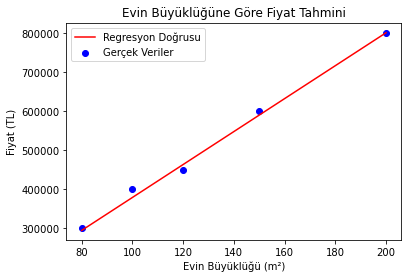

In [1]:
#REGRASYON MODELİ OLUŞTURMA 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini oluşturma
data = {
    'Evin Büyüklüğü (m²)': [80, 100, 120, 150, 200],
    'Oda Sayısı': [2, 3, 3, 4, 4],
    'Ev Yaşı (yıl)': [10, 5, 2, 1, 0],
    'Fiyat (TL)': [300000, 400000, 450000, 600000, 800000]
}

df = pd.DataFrame(data)

# Bağımsız ve bağımlı değişkenleri tanımlama
X = df[['Evin Büyüklüğü (m²)']]  # Bağımsız değişken
y = df['Fiyat (TL)']              # Bağımlı değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Model ile tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdırma
print("Test Seti için Gerçek Fiyatlar:", y_test.values)
print("Tahmin Edilen Fiyatlar:", y_pred)
print("Ortalama Kare Hata (MSE):", mse)
print("R^2 Skoru:", r2)

# Sonuçları görselleştirme
plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(X, model.predict(X), color='red', label='Regresyon Doğrusu')
plt.xlabel('Evin Büyüklüğü (m²)')
plt.ylabel('Fiyat (TL)')
plt.title('Evin Büyüklüğüne Göre Fiyat Tahmini')
plt.legend()
plt.show()


In [2]:
import pandas as pd

# Veri seti oluşturma
data = {
    'Evin Büyüklüğü (m²)': [80, 100, 120, 150, 200],
    'Oda Sayısı': [2, 3, 3, 4, 4],
    'Ev Yaşı (yıl)': [10, 5, 2, 1, 0],
    'Fiyat (TL)': [300000, 400000, 450000, 600000, 800000]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Eve kaç kişinin sığabileceğini tahmin etme (ortalama 2 kişi/oda)
df['Kişi Sayısı Tahmini'] = df['Oda Sayısı'] * 2

# Sonucu gösterme
print(df[['Evin Büyüklüğü (m²)', 'Oda Sayısı', 'Kişi Sayısı Tahmini']])


   Evin Büyüklüğü (m²)  Oda Sayısı  Kişi Sayısı Tahmini
0                   80           2                    4
1                  100           3                    6
2                  120           3                    6
3                  150           4                    8
4                  200           4                    8


In [3]:
import pandas as pd

# Veri seti oluşturma
data = {
    'Evin Büyüklüğü (m²)': [80, 100, 120, 150, 200],
    'Oda Sayısı': [2, 3, 3, 4, 4],
    'Ev Yaşı (yıl)': [10, 5, 2, 1, 0],
    'Fiyat (TL)': [300000, 400000, 450000, 600000, 800000]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Eve kaç kişinin sığabileceğini tahmin etme (ortalama 2 kişi/oda)
df['Kişi Sayısı Tahmini'] = df['Oda Sayısı'] * 2

# M² başına fiyat tahmini
df['M² Başına Fiyat (TL)'] = df['Fiyat (TL)'] / df['Evin Büyüklüğü (m²)']

# Sonucu gösterme
print(df[['Evin Büyüklüğü (m²)', 'Fiyat (TL)', 'Kişi Sayısı Tahmini', 'M² Başına Fiyat (TL)']])


   Evin Büyüklüğü (m²)  Fiyat (TL)  Kişi Sayısı Tahmini  M² Başına Fiyat (TL)
0                   80      300000                    4                3750.0
1                  100      400000                    6                4000.0
2                  120      450000                    6                3750.0
3                  150      600000                    8                4000.0
4                  200      800000                    8                4000.0


In [5]:
import pandas as pd

# Veri seti oluşturma
data = {
    'Evin Büyüklüğü (m²)': [80, 100, 120, 150, 200],
    'Oda Sayısı': [2, 3, 3, 4, 4],
    'Ev Yaşı (yıl)': [10, 5, 2, 1, 0],
    'Fiyat (TL)': [300000, 400000, 450000, 600000, 800000]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Oda başına ortalama 2 kişi sığacağını varsayıyoruz
ortalama_kisi_sayisi = 2

# Oda sayısına göre toplam kişi sayısını tahmin etme
df['Kişi Sayısı Tahmini'] = df['Oda Sayısı'] * ortalama_kisi_sayisi

# Sonucu gösterme
print(df[['Evin Büyüklüğü (m²)', 'Oda Sayısı', 'Kişi Sayısı Tahmini']])


   Evin Büyüklüğü (m²)  Oda Sayısı  Kişi Sayısı Tahmini
0                   80           2                    4
1                  100           3                    6
2                  120           3                    6
3                  150           4                    8
4                  200           4                    8


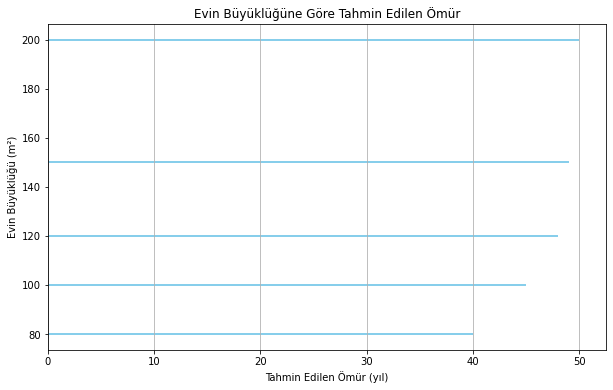

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri seti oluşturma
data = {
    'Evin Büyüklüğü (m²)': [80, 100, 120, 150, 200],
    'Oda Sayısı': [2, 3, 3, 4, 4],
    'Ev Yaşı (yıl)': [10, 5, 2, 1, 0],
    'Fiyat (TL)': [300000, 400000, 450000, 600000, 800000]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Ortalama ömür tahmini (yıl) - Bu tahmini özelleştirebilirsiniz
ortalama_omur_tahmini = 50  # Örneğin, genel bir yapı ömrü olarak 50 yıl alalım

# Her evin tahmin edilen ömrü
df['Tahmin Edilen Ömür (yıl)'] = ortalama_omur_tahmini - df['Ev Yaşı (yıl)']

# Verileri en yüksekten en aza sıralama
df_sorted = df.sort_values(by='Tahmin Edilen Ömür (yıl)', ascending=False)

# Grafik çizme
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Evin Büyüklüğü (m²)'], df_sorted['Tahmin Edilen Ömür (yıl)'], color='skyblue')
plt.xlabel('Tahmin Edilen Ömür (yıl)')
plt.ylabel('Evin Büyüklüğü (m²)')
plt.title('Evin Büyüklüğüne Göre Tahmin Edilen Ömür')
plt.grid(axis='x')

# Grafiği gösterme
plt.show()


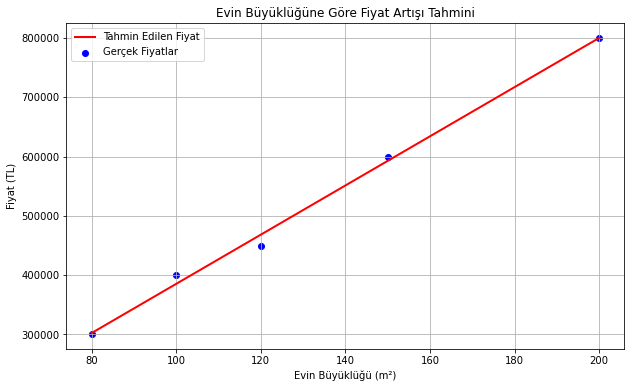

Evin Büyüklüğü: 80.0 m², Gerçek Fiyat: 300000.0 TL, Tahmin Edilen Fiyat: 302613.64 TL
Evin Büyüklüğü: 100.0 m², Gerçek Fiyat: 400000.0 TL, Tahmin Edilen Fiyat: 385568.18 TL
Evin Büyüklüğü: 120.0 m², Gerçek Fiyat: 450000.0 TL, Tahmin Edilen Fiyat: 468522.73 TL
Evin Büyüklüğü: 150.0 m², Gerçek Fiyat: 600000.0 TL, Tahmin Edilen Fiyat: 592954.55 TL
Evin Büyüklüğü: 200.0 m², Gerçek Fiyat: 800000.0 TL, Tahmin Edilen Fiyat: 800340.91 TL


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Veri seti oluşturma
data = {
    'Evin Büyüklüğü (m²)': [80, 100, 120, 150, 200],
    'Fiyat (TL)': [300000, 400000, 450000, 600000, 800000]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Girdi ve çıktı değişkenlerini tanımlama
X = df[['Evin Büyüklüğü (m²)']]  # Özellikler (girdi)
y = df['Fiyat (TL)']              # Hedef değişken (çıktı)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Fiyat tahmini
df['Tahmin Edilen Fiyat'] = model.predict(X)

# Grafik çizme
plt.figure(figsize=(10, 6))
plt.scatter(df['Evin Büyüklüğü (m²)'], df['Fiyat (TL)'], color='blue', label='Gerçek Fiyatlar')
plt.plot(df['Evin Büyüklüğü (m²)'], df['Tahmin Edilen Fiyat'], color='red', label='Tahmin Edilen Fiyat', linewidth=2)

# Grafik detayları
plt.xlabel('Evin Büyüklüğü (m²)')
plt.ylabel('Fiyat (TL)')
plt.title('Evin Büyüklüğüne Göre Fiyat Artışı Tahmini')
plt.legend()
plt.grid()

# Grafiği gösterme
plt.show()

# Evin büyüklüğüne göre fiyat artışını gösterme
for index, row in df.iterrows():
    print(f"Evin Büyüklüğü: {row['Evin Büyüklüğü (m²)']} m², Gerçek Fiyat: {row['Fiyat (TL)']} TL, Tahmin Edilen Fiyat: {row['Tahmin Edilen Fiyat']:.2f} TL")
